Questions corporate would like you to answer:

1) What is the relationship between sensation seeking and movie experience? <br>
2) Is there evidence of personality types based on the data of these research participants? If so, characterize these types both quantitatively and narratively.<br>
3) Are movies that are more popular rated higher than movies that are less popular?<br>
4) Is enjoyment of ‘Shrek (2001)’ gendered, i.e. do male and female viewers rate it differently?<br>
5) Do people who are only children enjoy ‘The Lion King (1994)’ more than people with siblings?<br>
6) Do people who like to watch movies socially enjoy ‘The Wolf of Wall Street (2013)’ more than those who prefer to watch them alone?<br>
7) There are ratings on movies from several franchises ([‘Star Wars’, ‘Harry Potter’, ‘The Matrix’, ‘Indiana Jones’, ‘Jurassic Park’, ‘Pirates of the Caribbean’, ‘Toy Story’, ‘Batman’]) in this dataset. How many of these are of inconsistent quality, as experienced by viewers?<br>

# Imports

In [383]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn import svm

In [3]:
dataset = pd.read_csv("movieReplicationSet.csv")

In [4]:
dataset.sample(10)

,The Life of David Gale (2003),Wing Commander (1999),Django Unchained (2012),Alien (1979),Indiana Jones and the Last Crusade (1989),Snatch (2000),Rambo: First Blood Part II (1985),Fargo (1996),Let the Right One In (2008),Black Swan (2010),...,When watching a movie I cheer or shout or talk or curse at the screen,When watching a movie I feel like the things on the screen are happening to me,As a movie unfolds I start to have problems keeping track of events that happened earlier,"The emotions on the screen ""rub off"" on me - for instance if something sad is happening I get sad or if something frightening is happening I get scared",When watching a movie I get completely immersed in the alternative reality of the film,Movies change my position on social economic or political issues,When watching movies things get so intense that I have to stop watching,Gender identity (1 = female; 2 = male; 3 = self-described),Are you an only child? (1: Yes; 0: No; -1: Did not respond),Movies are best enjoyed alone (1: Yes; 0: No; -1: Did not respond)
428,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,0,0
913,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,4.0,...,2.0,1.0,1.0,4.0,3.0,3.0,1.0,1.0,0,1
792,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.0,5.0,1.0,5.0,4.0,5.0,4.0,1.0,0,0
174,1.0,0.5,0.5,0.0,1.0,1.5,0.5,0.5,0.0,2.0,...,1.0,6.0,6.0,6.0,6.0,5.0,1.0,2.0,0,1
56,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.5,NaN,4.0,...,NaN,4.0,4.0,4.0,4.0,2.0,3.0,1.0,0,1
507,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,3.5,...,3.0,4.0,4.0,4.0,4.0,4.0,4.0,1.0,0,1
961,NaN,NaN,4.0,4.0,4.0,4.0,2.0,3.5,NaN,3.0,...,2.0,3.0,2.0,3.0,4.0,3.0,1.0,2.0,1,0
513,2.0,1.0,1.0,0.0,3.0,1.0,1.0,1.5,3.5,3.0,...,4.0,4.0,2.0,3.0,5.0,2.0,1.0,1.0,0,1
224,NaN,0.0,4.0,NaN,3.0,NaN,2.5,NaN,NaN,3.0,...,3.0,3.0,4.0,4.0,4.0,4.0,4.0,2.0,0,-1
201,NaN,NaN,3.5,4.0,NaN,NaN,NaN,NaN,NaN,4.0,...,4.0,4.0,1.0,6.0,6.0,4.0,2.0,1.0,0,1


# Data Exploration

From task: 

Dataset description: This dataset features ratings data of 400 movies from 1097 research participants 
and is contained in the file “movieReplicationSet.csv”. It is organized as follows: <br>

1st row: Headers (Movie titles/questions) – note that the indexing in this list is from 1 <br>
Row 2-1098: Responses from individual participants<br>
Columns 1-400: These columns contain the ratings for the 400 movies (0 to 4, and missing)<br>
Columns 401-420: These columns contain self-assessments on sensation seeking behaviors (1-5)<br>
Columns 421-464: These columns contain responses to personality questions (1-5)<br>
Columns 465-474: These columns contain self-reported movie experience ratings (1-5)<br>
Column 475: Gender identity (1 = female, 2 = male, 3 = self-described)<br>
Column 476: Only child (1 = yes, 0 = no, -1 = no response)<br>
Column 477: Social viewing preference – “movies are best enjoyed alone” (1 = y, 0 = n, -1 = nr)<br>

Note that we did most of the data munging for you already (e.g. Python interprets commas in a csv
file as separators, so we removed all commas from movie titles), but you still need to handle missing
data in some way

In [199]:
movieRatings = dataset.iloc[:,:400]
ssbehavior = dataset.iloc[:,400:420]
personality= dataset.iloc[:,420:464]
movieXP = dataset.iloc[:,464:474]
gender = dataset.iloc[:,474]
onlyChild = dataset.iloc[:,475]
socialPref = dataset.iloc[:,476]

# Questions

## 1) What is the relationship between sensation seeking and movie experience? <br>

In [115]:
#Exploratory Analysis-Sensation Seeking Qs
for num,i in enumerate(ssbehavior.columns,1):
    print("Q%s: %s | null count: %s" % (num,i, ssbehavior.iloc[:,num -1].isnull().sum()) )

Q1: I enjoy driving fast | null count: 3
Q2: I enjoy rollercoasters  | null count: 4
Q3: Have you ever bungee-jumped? | null count: 5
Q4: I enjoy impulse shopping | null count: 6
Q5: I sometimes go out on weeknights even if I have work to do | null count: 3
Q6: I enjoy doing things without too much planning  | null count: 3
Q7: Have you ever been rock climbing? | null count: 3
Q8: I enjoy being in large loud crowds like the Times Square Ball Drop on New Years Eve | null count: 6
Q9: I enjoy going to large music or dance festivals  | null count: 3
Q10: I enjoy watching horror movies | null count: 5
Q11: No risk - No fun | null count: 4
Q12: I like to be surprised even if it startles or scares me | null count: 3
Q13: Have you ever parachuted? | null count: 5
Q14: I enjoy haunted houses | null count: 3
Q15: I had a sheltered upbringing | null count: 3
Q16: My life is very stressful | null count: 3
Q17: I value my life to be well ordered and predictable | null count: 4
Q18: Have you ridden

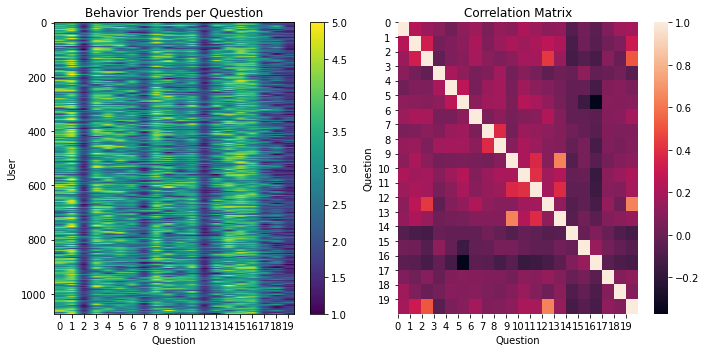

In [116]:
#If I can reduce the # of columns (by doing a PCA), it'll help me later.
plt.subplot(1,2,1)
plt.imshow(ssbehavior.dropna(how='any'),aspect='auto')
plt.xticks(range(0,20))
plt.title('Behavior Trends per Question')
plt.xlabel('Question')
plt.ylabel('User')
plt.colorbar()
#Overall high variability, but some questions have glaring trends (2,7,12,17-19)



#This is further emphasized looking at the correlation between certain questions.
#There exist high correlation between all questions. Q14-16 are exceptionally lower, but correlate with eachother & have high variance.
#Could imply future factor

plt.subplot(1,2,2)

sn.heatmap(ssbehavior.corr())
plt.xticks(range(0,20),rotation=0,labels=range(0,20))
plt.yticks(range(0,20),labels=range(0,20))
plt.title("Correlation Matrix")
plt.ylabel('Question')
plt.xlabel('Question')

plt.rcParams["figure.figsize"] = (10,5)
plt.tight_layout()
plt.show()


#Reasonable enough evidence to do a PCA and attempt to make the questions more concise, and more importantly answer the question easier & faster.

In [249]:
#PCA
npsense = ssbehavior.dropna(how='any').to_numpy()
#expects normal distribution, z-score data
zScoredSS = stats.zscore(npsense)
#init object & fit
pca = PCA().fit(zScoredSS)
#eigenvalues, decreasing magnitude
eigVals = pca.explained_variance_
#eigenvectors, weights per factor in original data
loadings = pca.components_
#20 Questions in terms of 20 factors instead of 20 variables
transfSS = pca.fit_transform(zScoredSS)
covarExplained = eigVals/sum(eigVals)*100

for ii in range(len(covarExplained)):
    print(covarExplained[ii].round(3))
    
#Covariance explained between factors is more spread out than I would like. The first 4 factors only explain 40% of the data

17.477
8.864
8.142
6.553
5.76
5.225
4.975
4.815
4.5
4.286
3.976
3.736
3.694
3.33
3.114
2.943
2.739
2.541
1.709
1.622


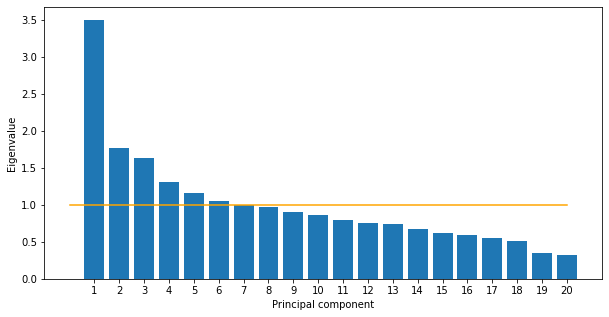

In [250]:
#scree plot
numQs = 20
x = np.linspace(1,numQs,numQs)
plt.bar(x, eigVals)
plt.plot([0,numQs],[1,1],color='orange') # Orange Kaiser criterion line
plt.xticks(range(1,21))
plt.xlabel('Principal component')
plt.ylabel('Eigenvalue')
plt.show()

In [251]:
#factor choice by Horn's method
numDraws = int(1e4)
numRows = np.size(zScoredSS,axis=0)
numColumns = np.size(zScoredSS,axis=1)
simEigs = np.empty([numDraws,numColumns])*np.NaN #simulated std normal distribution of the same size

# Simulate null distribution of eigenvalues:
for ii in range(numDraws):
    # Randomly draw the simulated data from a standard normal distribution:
    simdata = np.random.normal(0,1,[numRows,numColumns])
    pca = PCA().fit(simdata)
    temp = pca.explained_variance_
    simEigs[ii] = temp

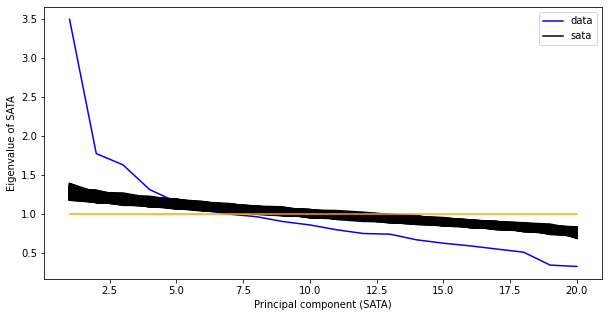

In [252]:
plt.plot(x,eigVals,color='blue') # plot eigVals from our PCA
plt.plot(x,np.transpose(simEigs),color='black') # plots eigVals (simulated)
plt.plot([1,numColumns],[1,1],color='orange') # Kaiser criterion line
plt.xlabel('Principal component (SATA)')
plt.ylabel('Eigenvalue of SATA')
plt.legend(['data','sata'])
plt.show()
#First four get above the noise, so I'll work with those four.

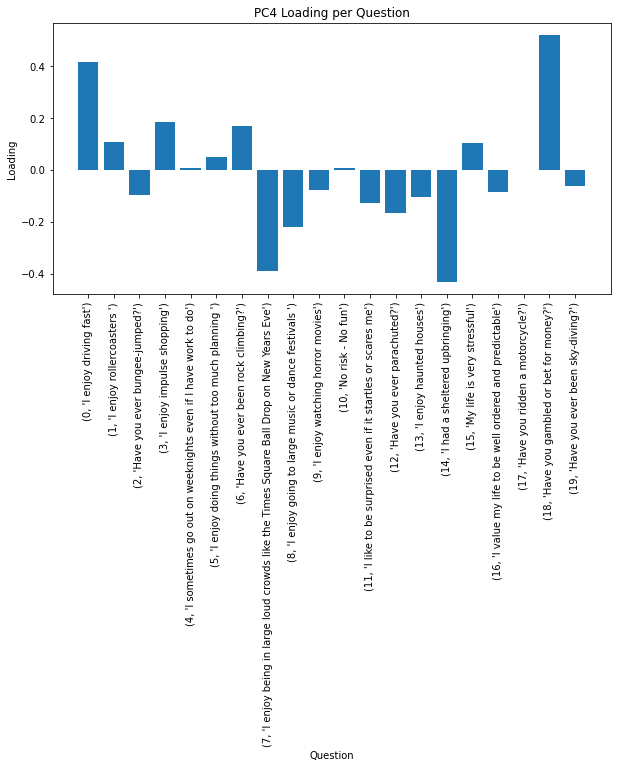

In [195]:
#interpret the first 4 factors
princomp = 4 #
plt.bar(x,loadings[princomp,:]*-1) # note: eigVecs multiplied by -1
plt.xlabel('Question')
plt.xticks(range(1,21),labels= enumerate(ssbehavior.columns),rotation=90)
plt.ylabel('Loading')
plt.title("PC%s Loading per Question" %princomp)
plt.show()

#PC1: Most + with (4,5,6),(7,8) Most - with (2,3,13,20)
#                    v      v                      v
#               Impulsive|Seeks Social Gatherings | Physical Thrill Seeker
#Overall: Extraversion

#PC2: Most + with (9,13,11,16)  Most - with (5,4,7)
#                  v                           v
#      Enjoys Scary Activities      |     Avoids Social Gatherings
#Overall: Introverted Horror fan

#PC3: Most + with (3,8,15,16), Most - with (5,11)
#                  v                         v
#                Busy           |        Improviser
#Overall: Busy Planner

#PC4: Most + with (0,18,3,6) , Most - with (7,8,14)
#                    v                        v 
#        Impulsive Thrill Seeker  |           Sheltered

#Overall: Impulsive
kept_SS = pd.DataFrame(transfSS[:,0:4], columns = ['Extraversion','Introverted Horror Fan', 'Busy Planner','Impulsive'])

In [200]:
#Repeat process for movie experience

#Exploratory Analysis-Movie Experience Qs
for num,i in enumerate(movieXP.columns,1):
    print("Q%s: %s | null count: %s" % (num,i, movieXP.iloc[:,num -1].isnull().sum()) )

Q1: I have cried during a movie | null count: 17
Q2: I have trouble following the story of a movie | null count: 22
Q3: I have trouble remembering the story of a movie a couple of days after seeing it | null count: 22
Q4: When watching a movie I cheer or shout or talk or curse at the screen | null count: 20
Q5: When watching a movie I feel like the things on the screen are happening to me | null count: 24
Q6: As a movie unfolds I start to have problems keeping track of events that happened earlier | null count: 19
Q7: The emotions on the screen "rub off" on me - for instance if something sad is happening I get sad or if something frightening is happening I get scared | null count: 22
Q8: When watching a movie I get completely immersed in the alternative reality of the film | null count: 23
Q9: Movies change my position on social economic or political issues | null count: 20
Q10: When watching movies things get so intense that I have to stop watching | null count: 18


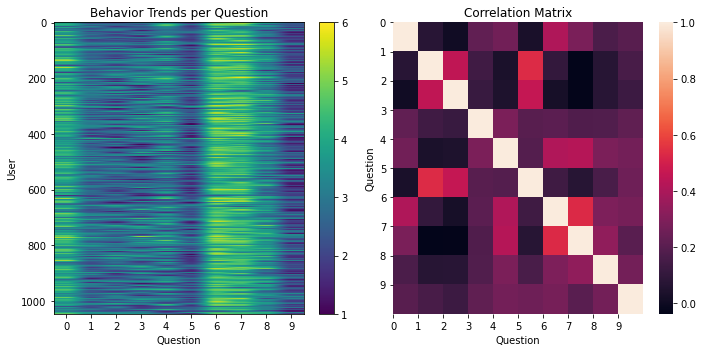

In [202]:
plt.subplot(1,2,1)
plt.imshow(movieXP.dropna(how='any'),aspect='auto')
plt.xticks(range(0,10))
plt.title('Behavior Trends per Question')
plt.xlabel('Question')
plt.ylabel('User')
plt.colorbar()
#Low variability with specific questions between Users, but reasonable enough to continue w/ a PCA if it makes it easier.

plt.subplot(1,2,2)
sn.heatmap(movieXP.corr())
plt.xticks(range(0,10),rotation=0,labels=range(0,10))
plt.yticks(range(0,10),labels=range(0,10))
plt.title("Correlation Matrix")
plt.ylabel('Question')
plt.xlabel('Question')
#A lot less correlation between these questions, probably won't be able to simplify some questions, delve deeper anyway.

plt.rcParams["figure.figsize"] = (10,5)
plt.tight_layout()
plt.show()


In [203]:
#PCA
npmovie = movieXP.dropna(how='any').to_numpy()
zScoredMXP = stats.zscore(npmovie)
pca = PCA().fit(zScoredMXP)
eigVals = pca.explained_variance_
loadings = pca.components_
transfMXP = pca.fit_transform(zScoredMXP)
covarExplained = eigVals/sum(eigVals)*100

for ii in range(len(covarExplained)):
    print(covarExplained[ii].round(3))
    
#First 2 factors might be good enough for simplicity. Around 50% of the data explained

29.426
18.75
8.779
8.557
7.724
6.951
5.743
5.54
4.389
4.141


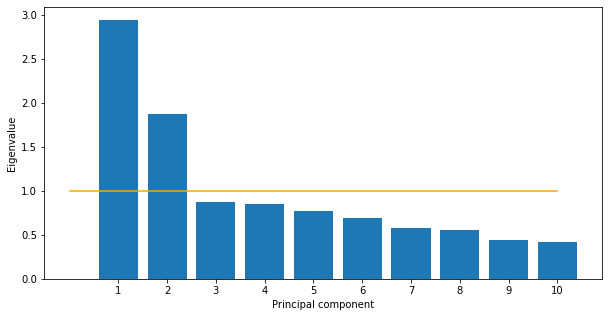

In [209]:
#scree plot
numQs = 10
x = np.linspace(1,numQs,numQs)
plt.bar(x, eigVals)
plt.plot([0,numQs],[1,1],color='orange')
plt.xticks(range(1,numQs+1))
plt.xlabel('Principal component')
plt.ylabel('Eigenvalue')
plt.show()

# This is simple enough where I'll just take the first two by Kaiser criterion

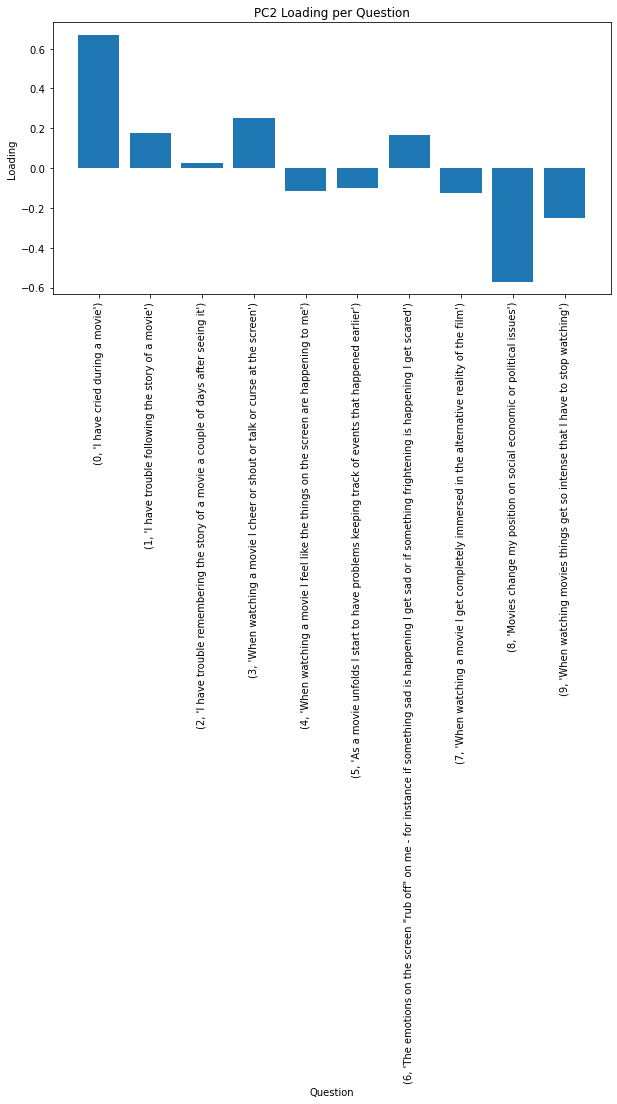

In [217]:
#interpret the first 2 factors
princomp = 2 #
plt.bar(x,loadings[princomp,:]*-1) # note: eigVecs multiplied by -1
plt.xlabel('Question')
plt.xticks(range(1,11),labels= enumerate(movieXP.columns),rotation=90)
plt.ylabel('Loading')
plt.title("PC%s Loading per Question" %princomp)
plt.show()

#PC1: Most + with (0,7,4,6) , Most  - with (1,2,5)
#                    v                       v
#             Sympathetic Viewer|       Attention Deficit
#Overall: Immersed Sympathetic

#PC2: Most + with (0,3), MOst - with (8,9)
#                   v                  v
#            Expressive       |   Fickle
#Overall: Stable Expressive

kept_MXP = pd.DataFrame(transfMXP[:,0:2],columns= ['Immersed Sympathetic','Stable Expressive'])

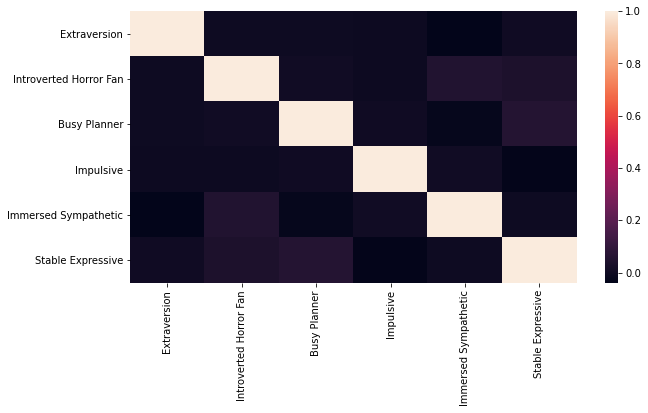

In [229]:
#Answer to Q1:
relationship_ssmxp = kept_SS.join(kept_MXP,how='inner')
sn.heatmap(relationship_ssmxp.corr())
plt.show()

#Slight positive relationship between sensation seeking and movie experience (Purple shade, ~0.2)

## 2) Is there evidence of personality types based on the data of these research participants? If so, characterize these types both quantitatively and narratively.

In [230]:
#Personality types would imply I can simplify their answers into, well, types. -> PCA

#Exploratory Analysis-Movie Experience Qs
for num,i in enumerate(personality.columns,1):
    print("Q%s: %s | null count: %s" % (num,i, personality.iloc[:,num -1].isnull().sum()) )

Q1: Is talkative | null count: 12
Q2: Tends to find fault with others | null count: 15
Q3: Does a thorough job | null count: 18
Q4: Is depressed/Blue | null count: 14
Q5: Is original/comes up with new ideas | null count: 17
Q6: Is reserved | null count: 16
Q7: Is helpful and unselfish with others | null count: 17
Q8: Can be somewhat careless | null count: 12
Q9: Is relaxed/handles stress well | null count: 17
Q10: Is curious about many different things | null count: 14
Q11: Is full of energy | null count: 13
Q12: Starts quarrels with others | null count: 12
Q13: Is a reliable worker | null count: 18
Q14: Can be tense | null count: 16
Q15: Is ingenious/a deep thinker | null count: 16
Q16: Generates a lot of Enthusiasm | null count: 12
Q17: Has a forgiving nature | null count: 13
Q18: Tends to be disorganized | null count: 13
Q19: Worries a lot | null count: 13
Q20: Has an active imagination | null count: 13
Q21: Tends to be quiet | null count: 14
Q22: Is generally trusting | null count:

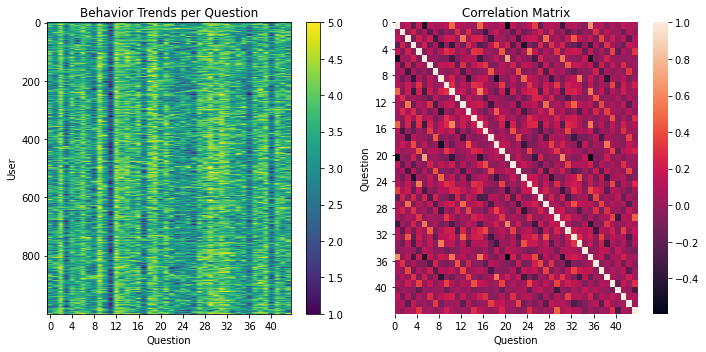

In [238]:
plt.subplot(1,2,1)
plt.imshow(personality.dropna(how='any'),aspect='auto')
plt.xticks(range(0,44,4))
plt.title('Behavior Trends per Question')
plt.xlabel('Question')
plt.ylabel('User')
plt.colorbar()
#High variability between most questions,save for one.

plt.subplot(1,2,2)
sn.heatmap(personality.corr())
plt.xticks(range(0,44,4),rotation=0,labels=range(0,44,4))
plt.yticks(range(0,44,4),labels=range(0,44,4))
plt.title("Correlation Matrix")
plt.ylabel('Question')
plt.xlabel('Question')
#High correlation between questions...good sign for PCA
plt.rcParams["figure.figsize"] = (10,5)
plt.tight_layout()
plt.show()

In [254]:
#PCA
nppersona = personality.dropna(how='any').to_numpy()
zScoredP = stats.zscore(nppersona)
pca = PCA().fit(zScoredP)
eigVals = pca.explained_variance_
loadings = pca.components_
transfP = pca.fit_transform(zScoredP)
covarExplained = eigVals/sum(eigVals)*100

for ii in range(len(covarExplained)):
    print(covarExplained[ii].round(3))
    
#First 5 factors explain 44% of the data

15.066
9.034
8.056
7.381
5.646
4.648
2.447
2.318
2.086
2.025
1.99
1.89
1.82
1.778
1.706
1.659
1.594
1.554
1.505
1.455
1.412
1.394
1.336
1.268
1.252
1.217
1.175
1.161
1.09
1.079
1.051
1.032
1.006
0.988
0.94
0.93
0.908
0.846
0.818
0.804
0.75
0.717
0.639
0.529


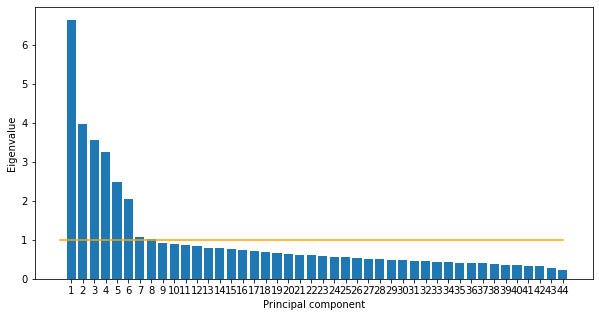

In [255]:
#scree plot
numQs = 44
x = np.linspace(1,numQs,numQs)
plt.bar(x, eigVals)
plt.plot([0,numQs],[1,1],color='orange')
plt.xticks(range(1,numQs+1))
plt.xlabel('Principal component')
plt.ylabel('Eigenvalue')
plt.show()

In [244]:
#factor choice by Horn's method
numDraws = int(1e4)
numRows = np.size(zScoredP,axis=0)
numColumns = np.size(zScoredP,axis=1)
simEigs = np.empty([numDraws,numColumns])*np.NaN #simulated std normal distribution of the same size

# Simulate null distribution of eigenvalues:
for ii in range(numDraws):
    # Randomly draw the simulated data from a standard normal distribution:
    simdata = np.random.normal(0,1,[numRows,numColumns])
    pca = PCA().fit(simdata)
    temp = pca.explained_variance_
    simEigs[ii] = temp

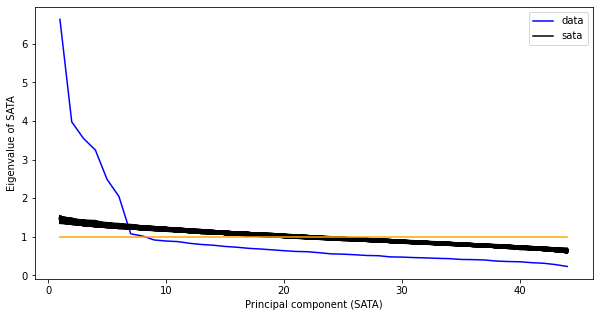

In [245]:
plt.plot(x,eigVals,color='blue') # plot eigVals from our PCA
plt.plot(x,np.transpose(simEigs),color='black') # plots eigVals (simulated)
plt.plot([1,numColumns],[1,1],color='orange') # Kaiser criterion line
plt.xlabel('Principal component (SATA)')
plt.ylabel('Eigenvalue of SATA')
plt.legend(['data','sata'])
plt.show()
#First four get above the noise, so I'll work with those four.

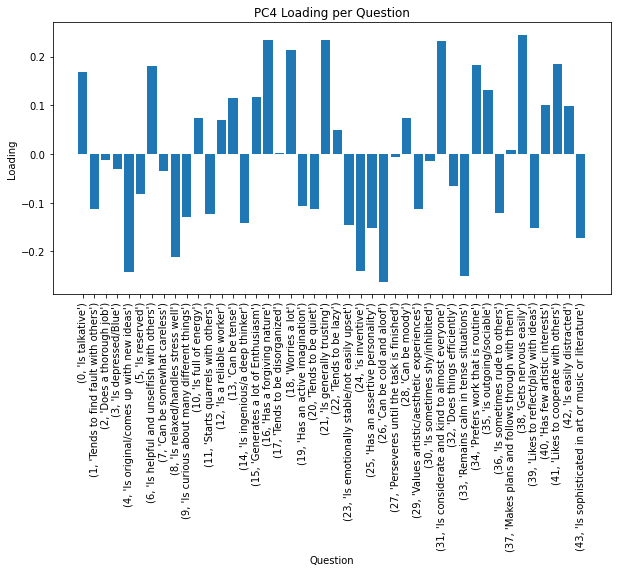

In [266]:
# interpret the first 4 factors
princomp = 4 #
plt.bar(x,loadings[princomp,:]*-1) # note: eigVecs multiplied by -1
plt.xlabel('Question')
plt.xticks(range(1,45),labels= enumerate(personality.columns),rotation=90)
plt.ylabel('Loading')
plt.title("PC%s Loading per Question" %princomp)
plt.show()

#PC1:Most + with (18,19,38,39,12,13), Most - with (8,23,33)
#                       v                           v
#                    Erratic           |           Stable
#Overall: Erratic 

#PC2: Most + with (5,6,12,20,30), Most -  with ( 0,11,34,35)
#                     v                               v
#                 Quiet            |              Social
#Overall: Asocial 

#PC3: Most  + with (1,2,12,27,32) , Most - with (17,16,22,7,42)
#                      v                            v
#                     Hard Worker   |               Focused
#Overall: Dedicated, Professional

#PC4:Most  + with (0,6,16,18,31,38) , Most - with (4,26,24,33)
#                       v                               v
#                  Friendly         |                 Aloof
#Overall: Aloof Friendly

kept_persona = pd.DataFrame(transfP[:,0:4],columns =['Erratic','Asocial','Professional','Aloof Friendly'])

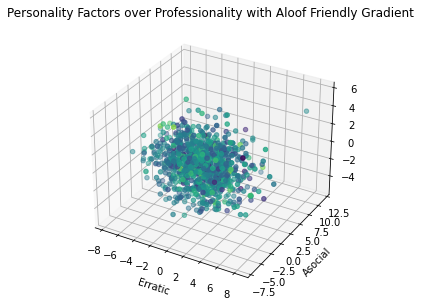

In [283]:
#Answer to Q2
fig = plt.figure()
ax = plt.axes(projection ='3d')
ax.scatter(kept_persona['Erratic'],kept_persona['Asocial'],kept_persona['Professional'],c = kept_persona['Aloof Friendly'])
plt.xlabel('Erratic')
plt.ylabel('Asocial')
plt.title('Personality Factors over Professionality with Aloof Friendly Gradient')
plt.show()
#It's not separating into types. Just a blob. I don't believe there is evidence for personality types.
#The independent factors still can overlap in a person, which is obviously shown by the plot.

## 3) Are movies that are more popular rated higher than movies that are less popular?

$H_{1}=$ Less popular movies are rated higher than more popular movies. <br>
$H_{2}=$ Less popular movies are rated lower than more popular movies. <br>
$H_{0}=$ There is no rating difference between less popular and more popular movies. (2001). <br>

In [15]:
#Select all the movies where the amount of nulls > than amount of not nulls ( must've seen the movie less)
lowPopularity= movies.loc[:,movies.isnull().sum()  > (movies.notnull().sum())]
#Select all the movies where the amount of nulls < than amount of not nulls ( must've seen the movie more)
highPopularity= movies.loc[:,movies.isnull().sum() <= (movies.notnull().sum())]

In [16]:
lp = lowPopularity.to_numpy().flatten()
mp = highPopularity.to_numpy().flatten()

lp = lp[np.isfinite(lp)]
mp = mp[np.isfinite(mp)]

u,p = stats.mannwhitneyu(lp,mp)
print("lowPop size: {}, highPop size:{} ".format(lp.shape[0],mp.shape[0]))
print("P-Value of:{}, which is less than alpha = 0.05".format(p))
#Chosen alpha =0.05 since I have a reasonable amount of data and power

lowPop size: 75783, highPop size:36431 
P-Value of:0.0, which is less than alpha = 0.05


Reject $H_{0}$ as p-value is less than alpha= 0.01.

## 4) Is enjoyment of ‘Shrek (2001)’ gendered, i.e. do male and female viewers rate it differently?

$H_{1}=$ Male and female viewers rate Shrek (2001) differently. <br>
$H_{0}=$ There is no rating difference between males and females on Shrek (2001). <br>

In [17]:
shrek =movies.loc[:,movies.columns.str.contains("Shrek \(2001\)")]
gender = characteristics.iloc[:,-3]

malesIndex = gender[gender == 2].index
femalesIndex = gender[gender == 1].index
#elt.wise removal
males = shrek.loc[malesIndex,:].dropna(how='any').to_numpy()
females=shrek.loc[femalesIndex,:].dropna(how='any').to_numpy()

In [18]:
shrekMedian = shrek.median().item()

In [19]:
j=0
for i in males:
    if(i==shrekMedian):
        males[j]=np.NaN
    elif(i> shrekMedian):
        males[j] = 1.0
    elif(i< shrekMedian):
        males[j] = 0.0
    j=j+1
j=0
for i in females:
    if(i==shrekMedian):
        females[j]=np.NaN
    elif(i> shrekMedian):
        females[j] = 1.0
    elif(i< shrekMedian):
        females[j] = 0.0
    j=j+1

In [20]:
females=females[np.isfinite(females)]
males = males[np.isfinite(males)]

In [21]:
print(females.mean(),males.mean(), females.std(),males.std() )

0.43154246100519933 0.3333333333333333 0.49529139438796566 0.47140452079103173


In [22]:
print("Group 1 size: {}, Group 2 size:{} ".format(females.shape[0],males.shape[0]))
u,p = stats.mannwhitneyu(males,females)
print("P-Value of:{}, which is less than alpha = 0.01".format(p))
#Chosen alpha =0.01 since I lost a lot of data from elt-wise removal

Group 1 size: 577, Group 2 size:195 
P-Value of:0.007936256310610606, which is less than alpha = 0.01


fail to reject $H_{0}$ as p-value is less than alpha= 0.01, but GPower says I need a larger sample size (336 and 1678)

## 5) Do people who are only children enjoy ‘The Lion King (1994)’ more than people with siblings?

$H_{1}=$ Only children enjoy The Lion King more than people with siblings <br>
$H_{2}=$ Only children enjoy The Lion King less than people with siblings <br>
$H_{0}=$ There is no rating difference in enjoyment of The Lion King between only children and people with siblings. <br>

In [23]:
lionKing = movies.loc[:,movies.columns.str.contains("The Lion King")]
question = characteristics.iloc[:,-2]

onlyChildrenIndex = question[question == 1].index
siblingsIndex = question[question==0].index

onchild=lionKing.loc[onlyChildrenIndex,:].dropna(how='any').to_numpy()
sibling= lionKing.loc[siblingsIndex,:].dropna(how='any').to_numpy()

In [24]:
lionKingMed = lionKing.median().item()

In [25]:
j=0
for i in onchild:
    if(i==lionKingMed):
        onchild[j]=np.NaN
    elif(i> lionKingMed):
        onchild[j] = 1.0
    elif(i< lionKingMed):
        onchild[j] = 0.0
    j=j+1
j=0
for i in sibling:
    if(i==lionKingMed):
        sibling[j]=np.NaN
    elif(i> lionKingMed):
        sibling[j] = 1.0
    elif(i< lionKingMed):
        sibling[j] = 0.0
    j=j+1

In [26]:
onchild = onchild[np.isfinite(onchild)]
sibling = sibling[np.isfinite(sibling)]

In [27]:
print(onchild.mean(),onchild.std(), sibling.mean(),sibling.std() )

0.5365853658536586 0.4986597146405092 0.6459016393442623 0.47823917827448725


In [28]:
print("Group 1 size: {}, Group 2 size:{} ".format(onchild.shape[0],sibling.shape[0]))
u,p = stats.mannwhitneyu(onchild,sibling)
print("P-Value of:{}, which is greater than alpha = 0.01".format(p))
#Chosen alpha =0.01 since I lost a lot of data from elt-wise removal

Group 1 size: 123, Group 2 size:610 
P-Value of:0.011131993342585494, which is greater than alpha = 0.01


Fail to reject $H_{0}$ as p-value is greater than alpha= 0.01.

## 6) Do people who like to watch movies socially enjoy ‘The Wolf of Wall Street (2013)’ more than those who prefer to watch them alone?


In [29]:
wolf = movies.loc[:,movies.columns.str.contains("The Wolf of Wall Street")]
question = characteristics.iloc[:,-1]

aloneIndex = question[question==1].index
togetherIndex = question[question ==0].index

alone = wolf.loc[aloneIndex,:].dropna(how='any').to_numpy()
together= wolf.loc[togetherIndex,:].dropna(how='any').to_numpy()

In [30]:
wolfMed = wolf.copy().median().item()

In [31]:
j=0
for i in alone:
    if(i==wolfMed):
        alone[j]=np.NaN
    elif(i> wolfMed):
        alone[j] = 1.0
    elif(i< wolfMed):
        alone[j] = 0.0
    j=j+1
j=0
for i in together:
    if(i==wolfMed):
        together[j]=np.NaN
    elif(i> wolfMed):
        together[j] = 1.0
    elif(i< wolfMed):
        together[j] = 0.0
    j=j+1

In [32]:
alone = alone[np.isfinite(alone)]
together = together[np.isfinite(together)]

In [33]:
u,p = stats.mannwhitneyu(alone,together)
print("P-Value of:{}, which is greater than alpha = 0.01".format(p))
#Chosen alpha =0.01 since I lost a lot of data from elt-wise removal

P-Value of:0.06591527552905596, which is greater than alpha = 0.01


Fail to reject $H_{0}$ as p-value is greater than alpha= 0.01.

## 7) There are ratings on movies from several franchises. How many of these are of inconsistent quality, as experienced by viewers?
([‘Star Wars’, ‘Harry Potter’, ‘The Matrix’, ‘Indiana Jones’, ‘Jurassic Park’, ‘Pirates of the Caribbean’, ‘Toy Story’, ‘Batman’]) in this dataset.


In [34]:
franchiseCounter= 0
#Null Hyp:The star wars franchise has no difference in ratings.
#Hyp 1: The star wars franchise has incosistencies in ratings.
sW = movies.loc[:,movies.columns.str.contains("Star Wars")].dropna(how='any')
#row-wise NaN removal-same people
n,p = stats.kruskal(sW.iloc[:,0],sW.iloc[:,1],sW.iloc[:,2],sW.iloc[:,3],sW.iloc[:,4],sW.iloc[:,5])
print("P-Value of:{}, which is less than alpha = 0.005".format(p))
#Chosen alpha =0.005 since I lost a lot of data from row-wise removal

franchiseCounter +=1

P-Value of:6.940162236984522e-40, which is less than alpha = 0.005


Reject $H_{0}$ as p-value is less than alpha= 0.005.

In [35]:
#Null Hyp:The harry potter franchise has no difference in ratings.
#Hyp 1: The harry potter franchise has incosistencies in ratings.

hP = movies.loc[:,movies.columns.str.contains("Harry Potter")].dropna(how='any')
n,p = stats.kruskal(hP.iloc[:,0],hP.iloc[:,1],hP.iloc[:,2],hP.iloc[:,3])
print("P-Value of:{}, which is less than alpha = 0.01".format(p))
#Chosen alpha =0.01 since I lost a lot of data from row-wise removal

P-Value of:0.11790622831256074, which is less than alpha = 0.01


Fail to reject $H_{0}$ as p-value is greater than alpha= 0.005.

In [36]:
#Null Hyp:The matrix franchise has no difference in ratings.
#Hyp 1: The matrix franchise has incosistencies in ratings.

mA = movies.loc[:,movies.columns.str.contains("The Matrix")].dropna(how='any')
n,p = stats.kruskal(mA.iloc[:,0],mA.iloc[:,1],mA.iloc[:,2])
print(mA.shape)
print("P-Value of:{}, which is less than alpha = 0.005".format(p))
#Chosen alpha =0.005 since I lost a lot of data from row-wise removal

franchiseCounter +=1

(260, 3)
P-Value of:1.7537323830838066e-09, which is less than alpha = 0.005


Reject $H_{0}$ as p-value is less than alpha= 0.005.

In [37]:
#Null Hyp:The indy jones franchise has no difference in ratings.
#Hyp 1: The indy jones franchise has incosistencies in ratings.

iJ = movies.loc[:,movies.columns.str.contains("Indiana Jones")].dropna(how='any')
n,p = stats.kruskal(iJ.iloc[:,0],iJ.iloc[:,1],iJ.iloc[:,2],iJ.iloc[:,3])
print(iJ.shape)
print("P-Value of:{}, which is less than alpha = 0.005".format(p))
#Chosen alpha =0.005 since I lost a lot of data from row-wise removal

franchiseCounter+=1

(244, 4)
P-Value of:1.020118354785894e-11, which is less than alpha = 0.005


Reject $H_{0}$ as p-value is less than alpha= 0.005.

In [38]:
#Null Hyp:The jurassic park franchise has no difference in ratings.
#Hyp 1: The jurassic park franchise has incosistencies in ratings.

jP = movies.loc[:,movies.columns.str.contains("Jurassic Park")].dropna(how='any')
n,p = stats.kruskal(iJ.iloc[:,0],iJ.iloc[:,1],iJ.iloc[:,2])
print(jP.shape)
print("P-Value of:{}, which is less than alpha = 0.005".format(p))
#Chosen alpha =0.005 since I lost a lot of data from row-wise removal

franchiseCounter +=1

(398, 3)
P-Value of:0.0032649729692746463, which is less than alpha = 0.005


Reject $H_{0}$ as p-value is less than alpha= 0.005.

In [39]:
#Null Hyp:The potc franchise has no difference in ratings.
#Hyp 1: The potc park franchise has incosistencies in ratings.

potc = movies.loc[:,movies.columns.str.contains("Pirates of the Caribbean")].dropna(how='any')
n,p = stats.kruskal(potc.iloc[:,0],potc.iloc[:,1],potc.iloc[:,2])
print(potc.shape)
print("P-Value of:{}, which is greater than alpha = 0.01".format(p))
#Chosen alpha =0.01 since I lost a lot of data from row-wise removal

(561, 3)
P-Value of:0.035792727694248905, which is greater than alpha = 0.01


Fail to reject $H_{0}$ as p-value is greater than alpha= 0.005.

In [40]:
#Null Hyp:The toy story franchise has no difference in ratings.
#Hyp 1: The toy story  franchise has incosistencies in ratings.

tS = movies.loc[:,movies.columns.str.contains("Toy Story")].dropna(how='any')
n,p = stats.kruskal(tS.iloc[:,0],tS.iloc[:,1],tS.iloc[:,2])
print(tS.shape)
print("P-Value of:{}, which is less than alpha = 0.01".format(p))
#Chosen alpha =0.01 since I lost a lot of data from row-wise removal
franchiseCounter+=1

(757, 3)
P-Value of:7.902234665149812e-06, which is less than alpha = 0.01


Reject $H_{0}$ as p-value is less than alpha= 0.005.

In [41]:
#Null Hyp:The batman franchise has no difference in ratings.
#Hyp 1: The batman  franchise has incosistencies in ratings.

bT = movies.loc[:,movies.columns.str.contains("Batman")].dropna(how='any')
n,p = stats.kruskal(bT.iloc[:,0],bT.iloc[:,1],bT.iloc[:,2])
print(bT.shape)
print("P-Value of:{}, which is less than alpha = 0.005".format(p))
#Chosen alpha =0.005 since I lost a lot of data from row-wise removal
franchiseCounter+=1

(219, 3)
P-Value of:4.1380499020034183e-19, which is less than alpha = 0.005


Reject $H_{0}$ as p-value is less than alpha= 0.005.

In [42]:
print("franchise counter:{} franchises have the possibility of inconsistent quality".format(franchiseCounter))

franchise counter:6 franchises have the possibility of inconsistent quality
